In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
16,1180,3,48.0
9,3700,5,167.0
5,1170,2,38.0
1,2600,4,120.0
3,1521,3,75.0


In [3]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()
scaled_X = sx.fit_transform(df.drop('price', axis='columns'))

In [4]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [5]:
def mini_batch_gradient_descent(X, y_true, epochs, batch_size = 5, learning_rate = 0.01):
    number_of_features = X.shape[1]
    #intializing all the weights to one
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
         
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
        
        # derivative functions
        w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
        b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
        
        # new weights 
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost

(array([0.81788824, 0.77819885]), -0.30433344481780616, 0.026629698183792537)

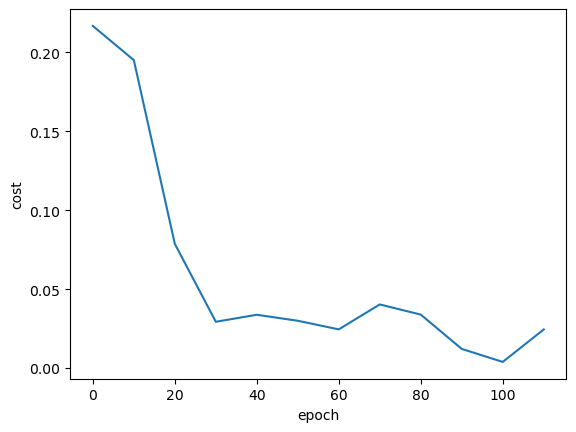

In [6]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [7]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

C:\Users\manpr\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


138.2410122331091